
## CLASIFICACIÓN DEL RIESGO DE ABANDONO DE LOS CLIENTES DE UN BANCO

El conjunto de datos con el que vamos a trabajar ahora contiene información sobre los usuarios de un banco. Queremos predecir si los clientes van a dejar de usar los servicios de dicho banco o no. El conjunto de datos consta de 10000 observaciones y 14 variables.

La siguiente figura indica cómo cargar el conjunto de Datos:

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [39]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [40]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Creamos una matriz con las variables de entrada y otra matriz con la variable de salida (objetivo, columna 14). Excluiremos la columna 1 y 2 que son ‘row_number’ y ‘customerid’ ya que no nos aportan información útil para el análisis.

In [41]:
X = dataset.iloc[:,3:13].values

In [42]:
X[0:4]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63]],
      dtype=object)

In [43]:
y = dataset.iloc[:,13].values

Vamos a hacer el análisis más sencillo si codificamos las variables no numéricas. Country contiene los valores: ’France, Spain, Germany’ y Gender: ‘Male, Female’. La manera de codificarlo será convertir estas palabras a valores numéricos. Para esto usaremos la función LabelEncoder, de la librería ‘ScikitLearn’, que al darle una cadena de texto nos devuelve valores entre 0 y n_clases-1.

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [45]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

Observamos que Country ahora toma valores del 0 al 2 mientras que male y female fueron reemplazados por 0 y 1.

Usaremos la función train_test_split de la librería ScikitLearn para dividir nuestros datos.

Usaremos 80% para entrenar el modelo y 20% para validarlo.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [48]:
X_train, X_test, y_train, y_test

(array([[686, 0, 1, ..., 1, 1, 179093.26],
        [632, 1, 1, ..., 1, 1, 195978.86],
        [559, 2, 1, ..., 1, 0, 85891.02],
        ...,
        [735, 0, 0, ..., 0, 0, 92220.12],
        [667, 0, 1, ..., 1, 0, 97508.04],
        [697, 1, 1, ..., 1, 1, 53581.14]], dtype=object),
 array([[596, 1, 1, ..., 0, 0, 41788.37],
        [623, 0, 1, ..., 1, 1, 146379.3],
        [601, 2, 0, ..., 1, 0, 58561.31],
        ...,
        [730, 0, 0, ..., 1, 0, 33373.26],
        [692, 0, 1, ..., 1, 0, 76755.99],
        [628, 1, 1, ..., 1, 1, 107674.3]], dtype=object),
 array([0, 0, 1, ..., 1, 1, 0]),
 array([0, 0, 0, ..., 1, 1, 1]))

Si observamos los datos detenidamente podemos apreciar que hay variables cuyos valores pueden
ser muy variados, desde muy altos a muy pequeños por esta razón escalaremos los datos.

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

In [51]:
X_train = sc.fit_transform(X_train)

In [52]:
X_test = sc.transform(X_test)

In [53]:
X_train, X_test, y_train, y_test

(array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
          0.97481699,  1.36766974],
        [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
          0.97481699,  1.6612541 ],
        [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
         -1.02583358, -0.25280688],
        ...,
        [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
         -1.02583358, -0.1427649 ],
        [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
         -1.02583358, -0.05082558],
        [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
          0.97481699, -0.81456811]]),
 array([[-0.57749609,  0.30164867,  0.91324755, ..., -1.54035103,
         -1.02583358, -1.01960511],
        [-0.29729735, -0.9055496 ,  0.91324755, ...,  0.64920267,
          0.97481699,  0.79888291],
        [-0.52560743,  1.50884694, -1.09499335, ...,  0.64920267,
         -1.02583358, -0.72797953],
        ...,
        [ 0.81311987, -0.9055496 , -1.09499335, ...,  

Una vez escalados los datos, pasamos a construir la red neuronal. Importamos Keras, usamos el módulo Sequential para inicializar la red y el modelo Dense para añadir capas ocultas.

In [54]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

Inicializamos la red con Sequential().

In [55]:
classifier = Sequential()

Añadimos las capas usando la función Dense. Indicamos el número de nodos que queremos añadir con output_dim, Init es la inicialización del descenso de gradiente estocástico. Los pesos iniciales serán una variable aleatoria uniforme. Input_dim sólo es necesaria en la primera capa para que el modelo sepa la cantidad de variables que va a recibir, en nuestro caso 11. A partir de aquí las siguientes capas heredarán esta cualidad de la primera capa. La función de activación que utilizaremos será relu en las dos primeras capas (cuanto más cerca tenga su valor a 1, la neurona estará más activada y tendrá más interacción) y en la capa final hemos utilizado la función sigmoide ya que nuestro objetivo es clasificar.

Una vez que tenemos la configuración específica de la red, la siguiente tarea es compilarla, para eso utilizamos la función Compile. El primer argumento de esta función es Optimizer que indica el método para entrenar los pesos. Adam es un algoritmo que se basa en el cálculo del descenso del Gradiente Estocástico. El segundo parámetro es loss, este usará la función ‘binary_crossentropy’ para clasificar en 2 categorías. Si tuviéramos más categorías utilizaríamos la función ‘categorical_crossentropy’. Para saber la bondad de nuestra red neuronal utilizaremos la métrica accuracy.

In [56]:
classifier.add(Dense(6, activation = 'relu', input_shape = (10,)))

/home/briansenas/Priv-master/SoftComputing/Optimizacion/guiones/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
classifier.add(Dense(6, activation = 'relu'))

In [58]:
classifier.add(Dense(1, activation = 'sigmoid'))

In [59]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

Usaremos la función fit para ajustar los pesos de la red. Batch_size para especificar el número de observaciones que necesita entrenar antes de actualizar los pesos. Epoch nos indica el número de iteraciones que realizaremos en el entrenamiento. La estimación de estos parámetros se tiene que hacer por ensayo-error, probando con diferentes valores.

In [60]:
classifier.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 7s 803us/step - accuracy: 0.7842 - loss: 0.5117
Epoch 2/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 7s 823us/step - accuracy: 0.7862 - loss: 0.4542
Epoch 3/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 797us/step - accuracy: 0.8240 - loss: 0.4163
Epoch 4/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 778us/step - accuracy: 0.8400 - loss: 0.3840
Epoch 5/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 792us/step - accuracy: 0.8461 - loss: 0.3750
Epoch 6/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 7s 821us/step - accuracy: 0.8452 - loss: 0.3704
Epoch 7/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 811us/step - accuracy: 0.8482 - loss: 0.3656
Epoch 8/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 7s 812us/step - accuracy: 0.8517 - loss: 0.3619
Epoch 9/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 7s 825us/step - accuracy: 0.8504 - loss: 0.3600
Epoch 10/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 801us/step - accuracy: 0.8481 - loss: 0.3587


Para realizar la predicción sobre nuestro conjunto de test lo haremos mediante la siguiente expresión:

In [61]:
y_pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [62]:
y_pred = (y_pred > 0.5)

La predicción nos proporcionará la probabilidad de pertenecer a un grupo u otro, de tal manera que aquellos valores mayores que 0.5 serán 1 y el resto 0.

Creamos una matriz de confusión y vemos los resultados:

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1562,   45],
       [ 234,  159]])

In [65]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



# Ejercicio: Búsqueda del mejor modelo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13].values
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
# To be able to import the sklear-wrapper
# !pip install scikeras
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [7]:
import numpy as np
import keras
from keras.layers import Input, Dense, Dropout
from keras import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(140421)
keras.utils.set_random_seed(140421)


def get_model(
    activation="relu",
    layer_config=None,
):
    """
    Generates the model
    """
    if not layer_config:
        layer_config = [(32, 0.1), (64, 0.2), (32, 0.2)]
    model = Sequential()
    model.add(Input((10,)))
    for layer in layer_config:
        model.add(Dense(layer[0], activation=activation))
        if len(layer) > 0 and layer[1] > 0.0:
            model.add(Dropout(layer[1]))
    model.add(Dense(1, activation="sigmoid"))
    return model


# We can try to stop overfitting and reduce learning rate if we plateu
fit_params = {
    "model__callbacks": [
        keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=2),
    ]
}

# Instantiate the wrapper to be able to use GridSearchCV
sk_model = KerasClassifier(
    get_model,
    loss="binary_crossentropy",
    # We are using a regularized adam optimizer
    optimizer=keras.optimizers.AdamW(),
)

# We create a pipeline to scale the training data
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", sk_model)
])

print(sk_model.get_params().keys())
# We now define the search parameters
activation = ["relu", "tanh"]
layer_configs = [
    [(6, 0), (12, 0.1)],
    [(6, 0), (12, 0.1), (6, 0.1)],
]
epochs = 8
batches = [1, 16, 32]
param_grid = dict(
    model__model__activation=activation,
    model__model__layer_config=layer_configs,
    model__batch_size=batches,
    model__epochs=[epochs],
)
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring={
        "accuracy": "accuracy",
        "f1": "f1",
        "recall": "recall",
        "precision": make_scorer(precision_score, zero_division=0.0),
    },
    refit="f1",
)
grid_result = grid.fit(X_train, y_train, **fit_params)

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])
Epoch 1/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 5s 804us/step - loss: 0.5092
Epoch 2/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 4s 776us/step - loss: 0.4322
Epoch 3/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 4s 781us/step - loss: 0.4196
Epoch 4/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 4s 766us/step - loss: 0.4098
Epoch 5/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 4s 763us/step - loss: 0.3831
Epoch 6/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 4s 767us/step - loss: 0.3706
Epoch 7/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 4s 775us/step - loss: 0.3657
Epoch 8/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 4s 770us/step - loss: 0.3622
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step
Epoch 1/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 5s 780us/step - loss: 0.5218
Epoch 2/8
5333/5333 ━━━━━━━━━━━━━━━━━━━━ 4s 766us/step - loss: 0.4376
Epoch 3/8
5333/5333 ━━━━━

In [ ]:
import pandas as pd
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(pd.DataFrame(grid_result.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__batch_size,param_model__model__activation,param_model__model__layer_config,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,4.720154,0.074360,2.004629,0.155651,1,relu,"[(6, 0), (6, 0.0)]","{'model__batch_size': 1, 'model__model__activa...",0.798275,0.817398,0.810953,0.808875,0.007944,4,0.112211,0.358366,0.151515,0.207364,0.107974,6,0.062500,0.250460,0.082873,0.131944,0.084215,6,0.548387,0.629630,0.882353,0.686790,0.142206,1
1,4.901872,0.060802,1.828469,0.019548,1,relu,"[(6, 0), (12, 0.1)]","{'model__batch_size': 1, 'model__model__activa...",0.795651,0.816273,0.796324,0.802749,0.009567,5,0.003656,0.332425,0.000000,0.112027,0.155852,8,0.001838,0.224678,0.000000,0.075505,0.105483,8,0.333333,0.638743,0.000000,0.324026,0.260849,8
2,4.764802,0.018788,1.826072,0.015068,1,tanh,"[(6, 0), (6, 0.0)]","{'model__batch_size': 1, 'model__model__activa...",0.817023,0.821147,0.804576,0.814249,0.007044,1,0.410628,0.364847,0.347935,0.374470,0.026483,1,0.312500,0.252302,0.255985,0.273596,0.027551,1,0.598592,0.658654,0.542969,0.600071,0.047240,3
3,4.975638,0.124864,1.826307,0.026365,1,tanh,"[(6, 0), (12, 0.1)]","{'model__batch_size': 1, 'model__model__activa...",0.821522,0.799775,0.816579,0.812625,0.009308,2,0.398990,0.284182,0.380228,0.354467,0.050285,2,0.290441,0.195212,0.276243,0.253965,0.041947,2,0.637097,0.522167,0.609756,0.589673,0.049022,4
4,1.223152,0.039092,0.350117,0.024941,16,relu,"[(6, 0), (6, 0.0)]","{'model__batch_size': 16, 'model__model__activ...",0.796025,0.799775,0.796324,0.797375,0.001702,7,0.000000,0.066434,0.000000,0.022145,0.031317,10,0.000000,0.034991,0.000000,0.011664,0.016495,10,0.000000,0.655172,0.000000,0.218391,0.308851,9
5,1.619508,0.015236,0.336193,0.019671,16,relu,"[(6, 0), (12, 0.1)]","{'model__batch_size': 16, 'model__model__activ...",0.796025,0.796400,0.796324,0.796250,0.000162,8,0.000000,0.000000,0.000000,0.000000,0.000000,11,0.000000,0.000000,0.000000,0.000000,0.000000,11,0.000000,0.000000,0.000000,0.000000,0.000000,11
6,1.250076,0.063356,0.359236,0.011378,16,tanh,"[(6, 0), (6, 0.0)]","{'model__batch_size': 16, 'model__model__activ...",0.800900,0.805399,0.793698,0.799999,0.004819,6,0.292943,0.217195,0.045139,0.185092,0.103681,7,0.202206,0.132597,0.023941,0.119581,0.073356,7,0.531401,0.600000,0.393939,0.508447,0.085675,5
7,1.686776,0.016382,0.355639,0.010256,16,tanh,"[(6, 0), (12, 0.1)]","{'model__batch_size': 16, 'model__model__activ...",0.810649,0.804649,0.813578,0.809625,0.003716,3,0.194577,0.192248,0.314483,0.233769,0.057081,4,0.112132,0.114180,0.209945,0.145419,0.045634,5,0.734940,0.607843,0.626374,0.656386,0.056059,2
8,1.763111,0.679456,0.270154,0.016512,32,relu,"[(6, 0), (6, 0.0)]","{'model__batch_size': 32, 'model__model__activ...",0.786277,0.796400,0.722056,0.768244,0.032921,12,0.006969,0.000000,0.153143,0.053370,0.070607,9,0.003676,0.000000,0.123389,0.042355,0.057319,9,0.066667,0.000000,0.201807,0.089491,0.083953,10
9,1.558790,0.026766,0.284905,0.012145,32,relu,"[(6, 0), (12, 0.1)]","{'model__batch_size': 32, 'model__model__activ...",0.796025,0.796400,0.796324,0.796250,0.000162,8,0.000000,0.000000,0.000000,0.000000,0.000000,11,0.000000,0.000000,0.000000,0.000000,0.000000,11,0.000000,0.000000,0.000000,0.000000,0.000000,11


In [ ]:
print(grid_result.best_params_, grid_result.best_score_)

{'model__batch_size': 1, 'model__model__activation': 'tanh', 'model__model__layer_config': [(6, 0), (6, 0.0)]} 0.37446993627028774


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.70      0.25      0.37       407

    accuracy                           0.83      2000
   macro avg       0.77      0.61      0.64      2000
weighted avg       0.81      0.83      0.79      2000



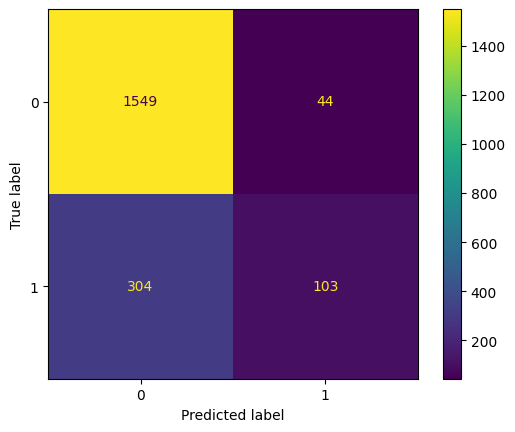

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = grid_result.best_estimator_.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_result.best_estimator_.classes_)
disp.plot()
print(metrics.classification_report(y_test, y_pred))

Observamos que incrementar el batch_size ha sido prejudicial para el aprendizaje del modelo, todos los modelos con batch_size mayor que 1 tienen peor rendimiento que aquellos que van de 1 en 1. La función de activación tanh parece ir mejor con un batch_size más grande. La configuración más sencilla (6, 6) es mejor que (6, 12).

Con el mejor modelo tenemos un buen F1 para el caso negativo. No obstante, el resultado para la clase positiva deja que desear. Sería interesante experimentar de forma más exhaustiva con fin de optimizar el caso positivo. Quizás, técnicas de sub / sobre muestreo puedan ayudar a confrontar el desequilibrio y que el modelo sea capaz de modelar mejor las clases positivas.